In [3]:
# CELL 1 by Mike Grad
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts


In [4]:
# CELL 2 by Mike Grad
# Assign file paths

# Commented out causes and causes_df throughout code because none of the cause codes in the reference table
# are in the raw datafile. When merging, all rows have NaN for those columns.
file_one = "Resources/Morticd10_part1"
file_two = "Resources/Morticd10_part2"
country_codes = "Resources/country_codes"
population = "Resources/pop"
#causes = "Resources/causes_master_list_final.csv"
sex = "Resources/sex_reference_table.csv"

# open raw mortality data files and merge them
file_one_df = pd.read_csv(file_one, encoding="utf-8")
file_two_df = pd.read_csv(file_two, encoding="utf-8")
country_codes_df = pd.read_csv(country_codes, encoding="utf-8")
population_df = pd.read_csv(population, encoding="utf-8")
#causes_df = pd.read_csv(causes, encoding="utf-8")
sex_df = pd.read_csv(sex, encoding="utf-8")

len(file_one_df)
type(file_one_df)
file_one_df.head()
len(file_one_df)

# verify all columns for file_one_df and file_two_df are identical
columns_one = file_one_df.columns
columns_two = file_two_df.columns

# visually compare column headers. verified all column headers are identical and appear in the same sequence.
print(columns_one)
print(columns_two)

# DO NOT remove header row from file_two_df





file_one_df.head()

# assign df to merged data

C:\Users\small\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\small\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex', 'Frmat',
       'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5',
       'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11',
       'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17',
       'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23',
       'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Deaths4'],
      dtype='object')
Index(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex', 'Frmat',
       'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5',
       'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11',
       'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17',
       'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23',
       'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Dea

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [5]:
# CELL 3 by Mike Grad
# combine file_one_df and file_two_df data
# Sourced from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
raw_tables = [file_one_df, file_two_df]
combined_data_df = pd.concat(raw_tables)

combined_data_df.head()
len(combined_data_df)

3945138

In [6]:
# CELL 4 by Mike Grad
# merge country codes into combined_data_df
country_codes_df.head()

country_codes_df = country_codes_df.rename(columns={"country": "Country"})
combined_data_df = pd.merge(combined_data_df, country_codes_df, on="Country", how="left")

# DEBUG!! name not renamed to Country Name
country_codes_df = combined_data_df.rename(columns={"name": "Country Name"})
combined_data_df

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,name
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN,Seychelles
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,Seychelles
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945133,4070,NaN,NaN,2017,103,Y86,1,2,1,39,...,4.0,4.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Finland
3945134,4070,NaN,NaN,2017,103,Y86,2,2,1,20,...,3.0,9.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Finland
3945135,4070,NaN,NaN,2017,103,Y87,1,2,1,2,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Finland
3945136,4070,NaN,NaN,2017,103,Y87,2,2,1,2,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Finland


In [7]:
# CELL 5 by Mike Grad
# Create dataframe with only the rows of the countries of interest:  United States of America, Canada, United Kingdom, New Zealand, and Brazil.  India and China are not in the extracted dataset.

# Extract list of countires in combined_data_df
countries_list = combined_data_df["name"].unique()
countries_dict = {"Country Name": countries_list}
countries_df = pd.DataFrame(countries_dict)
countries_df

countries_df = countries_df.sort_values("Country Name")

# Verify spelling for countries of interest by exporting full list of countries and inspecting csv
countries_df.to_csv("Output/countries.csv", index=False, header=True)

country_filtered_df = combined_data_df.loc[(combined_data_df["name"] == "United States of America") | (combined_data_df["name"] == "Canada") |
                                          (combined_data_df["name"] == "United Kingdom") | (combined_data_df["name"] == "New Zealand") |
                                          (combined_data_df["name"] == "Brazil"), :]

country_filtered_df

# 578025 rows
print(len(country_filtered_df))

# export df to csv and inspect in XL
country_filtered_df.to_csv("Output/country_filtered_raw_data.csv", index=False, header=True)

# drop na
# 0 rows left if do a dropna
country_filtered_nona_df = country_filtered_df.dropna()

# DEBUG!! -- SKIP
# replace NaN values with ""
country_filtered_df

# Test if sum and mean will work with NaN values in some of the columns - test on IM_Deaths2 (which has NaN entries for brazil)
# Visual inspection of the data in MS Excel showed no string values in columns containing mortality numbers
#country_filtered_df["IM_Deaths2"].mean()

#country_filtered_df["Total"] = ""

#for i in range(len(country_filtered_df["IM_Deaths1"])):
#    country_filtered_df.iloc[i, -1] = country_filtered_df.iloc[i, -6] + country_filtered_df.iloc[i, -5] + country_filtered_df.iloc[i, -4] + country_filtered_df.iloc[i, -3]

country_filtered_df
countries_df

578025


,Country Name
113,Andorra
31,Anguilla
32,Antigua and Barbuda
33,Argentina
121,Armenia
...,...
73,United States of America
75,Uruguay
28,Uzbekistan
76,Venezuela


In [8]:
# CELL 5.01
# Merge in population info

# FIXED: -- merging changes len from 578,025 rows to 6,244,231 rows -- WHY???
# -- needed to add "Sex" as key to merge on
# country_codes_df = country_codes_df.rename(columns={"country": "Country"})
age_adj_df = pd.merge(combined_data_df, population_df, on=["Country", "Year", "Sex"], how="left")

age_adj_df.columns
print(len(combined_data_df))
print(len(age_adj_df))
age_adj_df

3945138
3945138


,Country,Admin1_x,SubDiv_x,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945133,4070,NaN,NaN,2017,103,Y86,1,2,1,39,...,180302.0,179277.0,135756.0,91240.0,58159.0,31952.0,10147.5,1646.0,0.0,25674.0
3945134,4070,NaN,NaN,2017,103,Y86,2,2,1,20,...,189169.5,193333.0,155460.0,118162.5,88738.0,64173.5,29216.5,7385.5,0.0,24647.0
3945135,4070,NaN,NaN,2017,103,Y87,1,2,1,2,...,180302.0,179277.0,135756.0,91240.0,58159.0,31952.0,10147.5,1646.0,0.0,25674.0
3945136,4070,NaN,NaN,2017,103,Y87,2,2,1,2,...,189169.5,193333.0,155460.0,118162.5,88738.0,64173.5,29216.5,7385.5,0.0,24647.0


In [9]:
# CELL 5.01b
# Verify pop columns do not have nan values


# Deaths1 (all) = 0
# Deaths2 (year 0) = 4484
# Deaths3 (year 1) = 4484
# Deaths4 (year 2) = 330281
# Deaths5 (year 3) = 330281
# Deaths6 (year 4) = 330281
# Deaths7 (years 5-9) = 4484
# Deaths8 (years 10-14) = 9260
# Deaths9 (years 15-19) = 4484
# Deaths10 (years 20-24) = 9260
# Deaths11 (years 25-29) = 4484
# Deaths12 (years 30-34) = 9260
# Deaths13 (years 35-39) = 4484
# Deaths14 (years 40-44) = 9260
# Deaths15 (years 45-49) = 4484
# Deaths16 (years 50-54) = 9260
# Deaths17 (years 55-59) = 4484
# Deaths18 (years 60-64) = 9260
# Deaths19 (years 61-69) = 4484
# Deaths20 (years 70-74) = 9584
# Deaths21 (years 75-79) = 4808
# Deaths22 (years 80-84) = 27151
# Deaths23 (years 85-89) = 27151
# Deaths24 (years 90-94) = 913599
# Deaths25 (years 95 and up) = 913599
# Deaths26 (age unspecified) = 4484

# Country = 0
# Year = 0
# List = 0
# Cause = 0
# Sex = 0
age_adj_df['Deaths26'].isnull().sum()
len(age_adj_df)

3945138

In [10]:
# CELL 5.02
# Create age adjusted death rates (deaths per 1000 people)

# 
age_adj_df["age_adj_death1"] = age_adj_df["Deaths1"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death2"] = age_adj_df["Deaths2"] * age_adj_df["Pop2"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death3"] = age_adj_df["Deaths3"] * age_adj_df["Pop3"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death4"] = age_adj_df["Deaths4"] * age_adj_df["Pop4"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death5"] = age_adj_df["Deaths5"] * age_adj_df["Pop5"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death6"] = age_adj_df["Deaths6"] * age_adj_df["Pop6"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death7"] = age_adj_df["Deaths7"] * age_adj_df["Pop7"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death8"] = age_adj_df["Deaths8"] * age_adj_df["Pop8"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death9"] = age_adj_df["Deaths9"] * age_adj_df["Pop9"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death10"] = age_adj_df["Deaths10"] * age_adj_df["Pop10"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death11"] = age_adj_df["Deaths11"] * age_adj_df["Pop11"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death12"] = age_adj_df["Deaths12"] * age_adj_df["Pop12"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death13"] = age_adj_df["Deaths13"] * age_adj_df["Pop13"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death14"] = age_adj_df["Deaths14"] * age_adj_df["Pop14"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death15"] = age_adj_df["Deaths15"] * age_adj_df["Pop15"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death16"] = age_adj_df["Deaths16"] * age_adj_df["Pop16"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death17"] = age_adj_df["Deaths17"] * age_adj_df["Pop17"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death18"] = age_adj_df["Deaths18"] * age_adj_df["Pop18"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death19"] = age_adj_df["Deaths19"] * age_adj_df["Pop19"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death20"] = age_adj_df["Deaths20"] * age_adj_df["Pop20"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death21"] = age_adj_df["Deaths21"] * age_adj_df["Pop21"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death22"] = age_adj_df["Deaths22"] * age_adj_df["Pop22"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death23"] = age_adj_df["Deaths23"] * age_adj_df["Pop23"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death24"] = age_adj_df["Deaths24"] * age_adj_df["Pop24"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death25"] = age_adj_df["Deaths25"] * age_adj_df["Pop25"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death26"] = age_adj_df["Deaths26"] * age_adj_df["Pop26"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_deathIM"] = age_adj_df["IM_Deaths1"] * age_adj_df["Lb"] / age_adj_df["Pop1"] * 1000
age_adj_df.columns

Index(['Country', 'Admin1_x', 'SubDiv_x', 'Year', 'List', 'Cause', 'Sex',
       'Frmat_x', 'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4',
       'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10',
       'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16',
       'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22',
       'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1',
       'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4', 'name', 'Admin1_y',
       'SubDiv_y', 'Frmat_y', 'Pop1', 'Pop2', 'Pop3', 'Pop4', 'Pop5', 'Pop6',
       'Pop7', 'Pop8', 'Pop9', 'Pop10', 'Pop11', 'Pop12', 'Pop13', 'Pop14',
       'Pop15', 'Pop16', 'Pop17', 'Pop18', 'Pop19', 'Pop20', 'Pop21', 'Pop22',
       'Pop23', 'Pop24', 'Pop25', 'Pop26', 'Lb', 'age_adj_death1',
       'age_adj_death2', 'age_adj_death3', 'age_adj_death4', 'age_adj_death5',
       'age_adj_death6', 'age_adj_death7', 'age_adj_death8', 'age_adj_death9',
       'age_adj_death10'

In [11]:
# CELL 5.03 by Mike Grad
# Create new age bins

age_adj_df["Total Deaths"] = age_adj_df["age_adj_death1"]
age_adj_df["Under 1 Yr Old"] = age_adj_df["age_adj_death2"]
age_adj_df["Age 1 Through 4"] = age_adj_df["age_adj_death3"] + age_adj_df["age_adj_death4"] + age_adj_df["age_adj_death5"] + age_adj_df["age_adj_death6"]
age_adj_df["Age 5 Through 19"] = age_adj_df["age_adj_death7"] + age_adj_df["age_adj_death8"] + age_adj_df["age_adj_death9"]
age_adj_df["Age 20 Through 24"] = age_adj_df["age_adj_death10"]
age_adj_df["Age 25 Through 34"] = age_adj_df["age_adj_death11"] + age_adj_df["age_adj_death12"]
age_adj_df["Age 35 Through 44"] = age_adj_df["age_adj_death13"] + age_adj_df["age_adj_death14"]
age_adj_df["Age 45 Through 64"] = age_adj_df["age_adj_death15"] + age_adj_df["age_adj_death16"] + age_adj_df["age_adj_death17"] + age_adj_df["age_adj_death18"]
age_adj_df["Age 65 Through 79"] = age_adj_df["age_adj_death19"] + age_adj_df["age_adj_death20"] + age_adj_df["age_adj_death21"]
age_adj_df["Age 80 and Above"] = age_adj_df["age_adj_death22"] + age_adj_df["age_adj_death23"] + age_adj_df["age_adj_death24"] + age_adj_df["age_adj_death25"]
age_adj_df["Unspecified Age"] = age_adj_df["age_adj_death26"]

age_adj_df["Unspecified Age"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
3945133    0.0
3945134    0.0
3945135    0.0
3945136    0.0
3945137    0.0
Name: Unspecified Age, Length: 3945138, dtype: float64

In [12]:
# CELL 5.03a by Mike Grad

# Get a list of all column names
# Sourced from https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)
age_adj_df.head()


,Country,Admin1_x,SubDiv_x,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,name,Admin1_y,SubDiv_y,Frmat_y,Pop1,Pop2,Pop3,Pop4,Pop5,Pop6,Pop7,Pop8,Pop9,Pop10,Pop11,Pop12,Pop13,Pop14,Pop15,Pop16,Pop17,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb,age_adj_death1,age_adj_death2,age_adj_death3,age_adj_death4,age_adj_death5,age_adj_death6,age_adj_death7,age_adj_death8,age_adj_death9,age_adj_death10,age_adj_death11,age_adj_death12,age_adj_death13,age_adj_death14,age_adj_death15,age_adj_death16,age_adj_death17,age_adj_death18,age_adj_death19,age_adj_death20,age_adj_death21,age_adj_death22,age_adj_death23,age_adj_death24,age_adj_death25,age_adj_death26,age_adj_deathIM,Total Deaths,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,8.0,2.0,NaN,NaN,NaN,1.0,NaN,9.0,NaN,21.0,NaN,36.0,NaN,39.0,NaN,53.0,NaN,68.0,NaN,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,11.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,12.0,NaN,13.0,NaN,21.0,NaN,48.0,NaN,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,NaN,3.0,NaN,7.0,NaN,2.0,NaN,3.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3.0,NaN,1.0,NaN,4.0,NaN,0.0,NaN,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# CELL 5.04 by Mike Grad
# Remove Unneeded columns from age_adj_df

# FIXED:  DEBUG!! KeyError: 'Admin1'
# Remove NaN columns Admin1 SubDiv
del age_adj_df["Admin1_x"]
del age_adj_df["SubDiv_x"]

# Remove Unneeded columns
del age_adj_df["List"]
del age_adj_df["Frmat_x"]
del age_adj_df["IM_Frmat"]


# Delete columns with high NaN counts
del age_adj_df["IM_Deaths2"]
del age_adj_df["IM_Deaths3"]
del age_adj_df["IM_Deaths4"]


# Rename Sex_x as Sex
age_adj_df = age_adj_df.rename(columns={"Sex_x": "Sex"})
age_adj_df.columns

KeyError: 'Admin1_x'

In [15]:
# CELL 5.04a by Mike Grad

# Get a list of all column names
# Sourced from https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)
age_adj_df.head()



,Country,Year,Cause,Sex,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Admin1_y,SubDiv_y,Frmat_y,Pop1,Pop2,Pop3,Pop4,Pop5,Pop6,Pop7,Pop8,Pop9,Pop10,Pop11,Pop12,Pop13,Pop14,Pop15,Pop16,Pop17,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb,age_adj_death1,age_adj_death2,age_adj_death3,age_adj_death4,age_adj_death5,age_adj_death6,age_adj_death7,age_adj_death8,age_adj_death9,age_adj_death10,age_adj_death11,age_adj_death12,age_adj_death13,age_adj_death14,age_adj_death15,age_adj_death16,age_adj_death17,age_adj_death18,age_adj_death19,age_adj_death20,age_adj_death21,age_adj_death22,age_adj_death23,age_adj_death24,age_adj_death25,age_adj_death26,age_adj_deathIM,Total Deaths,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age
0,1400,2001,1000,1,332,8.0,2.0,NaN,NaN,NaN,1.0,NaN,9.0,NaN,21.0,NaN,36.0,NaN,39.0,NaN,53.0,NaN,68.0,NaN,95.0,NaN,NaN,NaN,NaN,0.0,8.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1400,2001,1000,2,222,11.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,12.0,NaN,13.0,NaN,21.0,NaN,48.0,NaN,112.0,NaN,NaN,NaN,NaN,0.0,11.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1400,2001,1001,1,24,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,NaN,3.0,NaN,7.0,NaN,2.0,NaN,3.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,0.0,0.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1400,2001,1001,2,14,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3.0,NaN,1.0,NaN,4.0,NaN,0.0,NaN,6.0,NaN,NaN,NaN,NaN,0.0,0.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1400,2001,1002,1,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# CELL 5.05 by Mike Grad
age_adj_df

# DEBUG!! -- age_adj_reduced_df = 0 rows.  LEAVE all NaNs in place
# Remove rows with NaNs
# age_adj_df has 6,244,231 rows
# dropna reduces the dataframe to 0 rows!!
#age_adj_reduced_df = age_adj_df.dropna()
#age_adj_reduced_df

,Country,Year,Cause,Sex,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Admin1_y,SubDiv_y,Frmat_y,Pop1,Pop2,Pop3,Pop4,Pop5,Pop6,Pop7,Pop8,Pop9,Pop10,Pop11,Pop12,Pop13,Pop14,Pop15,Pop16,Pop17,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb,age_adj_death1,age_adj_death2,age_adj_death3,age_adj_death4,age_adj_death5,age_adj_death6,age_adj_death7,age_adj_death8,age_adj_death9,age_adj_death10,age_adj_death11,age_adj_death12,age_adj_death13,age_adj_death14,age_adj_death15,age_adj_death16,age_adj_death17,age_adj_death18,age_adj_death19,age_adj_death20,age_adj_death21,age_adj_death22,age_adj_death23,age_adj_death24,age_adj_death25,age_adj_death26,age_adj_deathIM,Total Deaths,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age
0,1400,2001,1000,1,332,8.0,2.0,NaN,NaN,NaN,1.0,NaN,9.0,NaN,21.0,NaN,36.0,NaN,39.0,NaN,53.0,NaN,68.0,NaN,95.0,NaN,NaN,NaN,NaN,0.0,8.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1400,2001,1000,2,222,11.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,12.0,NaN,13.0,NaN,21.0,NaN,48.0,NaN,112.0,NaN,NaN,NaN,NaN,0.0,11.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1400,2001,1001,1,24,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,NaN,3.0,NaN,7.0,NaN,2.0,NaN,3.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,0.0,0.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1400,2001,1001,2,14,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3.0,NaN,1.0,NaN,4.0,NaN,0.0,NaN,6.0,NaN,NaN,NaN,NaN,0.0,0.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1400,2001,1002,1,0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945133,4070,2017,Y86,1,39,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0,2.0,5.0,6.0,6.0,2.0,4.0,4.0,NaN,NaN,0.0,0.0,Finland,NaN,NaN,0.0,2715729.0,26406.0,27932.0,29334.0,30223.0,30855.0,158126.5,153174.5,152704.5,169905.5,180383.5,182840.0,179517.0,168858.0,169148.0,186625.5,181216.5,180302.0,179277.0,135756.0,91240.0,58159.0,31952.0,10147.5,1646.0,0.0,25674.0,0.014361,0.0,0.0,NaN,NaN,NaN,58.226171,0.0,56.229653,0.0,66.42176,67.326305,0.0,186.53334,62.284565,137.440444

In [17]:
# CELL 5.06 by Mike Grad
# create new df with only columns of interest
age_adj_reduced_df = age_adj_df[["Country", "Year", "Cause", "Sex", 'Total Deaths', 'Under 1 Yr Old', \
                                'Age 1 Through 4', 'Age 5 Through 19', 'Age 20 Through 24', 'Age 25 Through 34', \
                                'Age 35 Through 44', 'Age 45 Through 64', 'Age 65 Through 79', 'Age 80 and Above', \
                                'Unspecified Age', 'Pop1', "name"]]
age_adj_reduced_df.head()


,Country,Year,Cause,Sex,Total Deaths,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age,Pop1,name
0,1400,2001,1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seychelles
1,1400,2001,1000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seychelles
2,1400,2001,1001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seychelles
3,1400,2001,1001,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seychelles
4,1400,2001,1002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seychelles


In [18]:
# CELL 5.07 by Mike Grad
# merge Country name into age_adj_reduced_df

# DEBUG!! merged file too big
#age_adj_reduced_df = pd.merge(age_adj_reduced_df, country_codes_df, on="Country", how="left")
len(age_adj_reduced_df)

3945138

In [19]:
# CELL 5.08 by Mike Grad
# create separate dfs for each country for age_adjusted data
# DEBUG!! age_adj_<COUNTRY>_df has 0 rows in each case -- why???

# usa data. country 2450
age_adj_usa_df = age_adj_reduced_df.loc[(age_adj_reduced_df["name"] == "United States of America"), :]

# DEBUG!! SyntaxError: invalid syntax
# canada data. coutnry - 2090
age_adj_can_df = age_adj_reduced_df.loc[(age_adj_reduced_df["name"] == "Canada"), :]

# uk data. country - 4308
age_adj_uk_df = age_adj_reduced_df.loc[(age_adj_reduced_df["name"] == "United Kingdom"), :]

# new zealand data - country 5150
age_adj_nz_df = age_adj_reduced_df.loc[(age_adj_reduced_df["name"] == "New Zealand"), :]

# brazil. country 2070
age_adj_bz_df = age_adj_reduced_df.loc[(age_adj_reduced_df["name"] == "Brazil"), :]
age_adj_usa_df

,Country,Year,Cause,Sex,Total Deaths,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age,Pop1,name
630372,2450,1999,A009,1,0.000008,0.000000,NaN,0.0,0.000000,0.0,0.000000,0.000000,32.539143,NaN,0.0,133276559.0,United States of America
630373,2450,1999,A020,1,0.000045,0.000000,NaN,0.0,68.902229,0.0,0.000000,37.274237,22.937289,NaN,0.0,133276559.0,United States of America
630374,2450,1999,A020,2,0.000050,0.000000,NaN,0.0,0.000000,0.0,80.547417,48.005665,61.292054,NaN,0.0,139414254.0,United States of America
630375,2450,1999,A021,1,0.000098,14.647234,NaN,0.0,68.902229,0.0,82.824647,97.287978,174.947389,NaN,0.0,133276559.0,United States of America
630376,2450,1999,A021,2,0.000072,13.397267,NaN,0.0,0.000000,0.0,0.000000,0.000000,193.007854,NaN,0.0,139414254.0,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3886615,2450,2017,Y883,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America
3886616,2450,2017,Y890,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America
3886617,2450,2017,Y891,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America
3886618,2450,2017,Y899,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America


In [21]:
# CELL 5.09 by Mike Grad
# write age_adj country dfs to csvs
# Commented out due to bug with canada data
# age_adj_can_df

age_adj_usa_df.to_csv("Output/age_adj_usa_df.csv", index=False, header=True)
age_adj_can_df.to_csv("Output/age_adj_can_df.csv", index=False, header=True)
age_adj_uk_df.to_csv("Output/age_adj_uk_df.csv", index=False, header=True)
age_adj_nz_df.to_csv("Output/age_adj_nz_df.csv", index=False, header=True)
age_adj_bz_df.to_csv("Output/age_adj_bz_df.csv", index=False, header=True)
print("wrote age adjusted to csv's.")

wrote age adjusted to csv's.


In [22]:
# Troubleshooting
population_df

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,Pop5,Pop6,Pop7,Pop8,Pop9,Pop10,Pop11,Pop12,Pop13,Pop14,Pop15,Pop16,Pop17,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,1.371000e+05,3400.000000,15800.000000,NaN,NaN,NaN,39200.00000,NaN,22700.00000,NaN,12600.00000,NaN,12600.00000,NaN,7800.00000,NaN,8200.000000,NaN,5300.000000,NaN,2900.000000,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,1.590000e+05,4000.000000,18400.000000,NaN,NaN,NaN,45400.00000,NaN,26300.00000,NaN,14600.00000,NaN,14600.00000,NaN,9100.00000,NaN,9500.000000,NaN,6200.000000,NaN,3400.000000,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5.051500e+06,150300.000000,543400.000000,NaN,NaN,NaN,615300.00000,603000.00000,501600.00000,414700.00000,379600.00000,356200.0000,376000.00000,293000.00000,242300.00000,210900.00000,110900.000000,110200.000000,51100.000000,41600.000000,14300.000000,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5.049400e+06,145200.000000,551000.000000,NaN,NaN,NaN,613400.00000,600700.00000,502200.00000,422000.00000,428100.00000,342800.0000,365100.00000,255100.00000,228900.00000,199800.00000,108900.000000,122100.000000,51100.000000,50700.000000,15800.000000,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5.353700e+06,158700.000000,576600.000000,NaN,NaN,NaN,653000.00000,639400.00000,531500.00000,439400.00000,402200.00000,377300.0000,398500.00000,310600.00000,256500.00000,223400.00000,117700.000000,116900.000000,54100.000000,44000.000000,14900.000000,12400.0,26600.0,NaN,NaN,0.0,250022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,5198,NaN,NaN,2018,2,3,3.260365e+05,8015.096596,7986.494468,7975.603354,7968.61169,7962.636894,39831.00157,38769.41976,34669.79841,28458.31845,24915.26327,23502.8376,20916.74711,18804.27792,15779.47958,11404.17516,9100.389873,6422.052069,5257.338854,3744.042066,4552.898314,NaN,NaN,NaN,NaN,0.0,NaN
9531,5200,NaN,NaN,2003,1,4,5.171100e+04,1156.000000,5045.000000,NaN,NaN,NaN,6495.00000,6338.00000,6183.00000,5252.00000,3652.00000,3102.0000,2814.00000,2261.00000,1938.00000,1627.00000,1454.000000,1390.000000,1193.000000,859.000000,952.000000,NaN,NaN,NaN,NaN,0.0,1433.0
9532,5200,NaN,NaN,2003,2,4,4.969300e+04,1065.000000,4713.000000,NaN,NaN,NaN,6067.00000,5578.00000,5588.00000,4967.00000,3557.00000,3011.0000,2724.00000,2381.00000,2151.00000,1861.00000,1642.000000,1406.000000,1122.000000,854.000000,1006.000000,NaN,NaN,NaN,NaN,0.0,1348.0
9533,4270,NaN,NaN,2016,1,0,9.627987e+06,103747.000000,102424.000000,99243.000000,94877.00000,94373.000000,539774.00000,539954.00000,554176.00000,547696.00000,687939.00000,671157.0000,774004.00000,777702.00000,860299.00000,533083.00000,624819.000000,625134.000000,498426.000000,319761.000000,280223.000000,181896.0,86140.0,26456.0,4182.0,502.0,105622.0


In [23]:
# Troubleshooting
new_population_df = population_df.groupby(['Country', 'Year']).sum().reset_index()
population_df
country_filtered_df

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,name
183198,2070,NaN,NaN,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Brazil
183199,2070,NaN,NaN,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Brazil
183200,2070,NaN,NaN,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Brazil
183201,2070,NaN,NaN,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Brazil
183202,2070,NaN,NaN,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901606,2070,NaN,NaN,2017,104,Y883,1,0,8,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,3.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Brazil
3901607,2070,NaN,NaN,2017,104,Y883,2,0,8,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,Brazil
3901608,2070,NaN,NaN,2017,104,Y890,2,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Brazil
3901609,2070,NaN,NaN,2017,104,Y899,1,0,8,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0,9.0,1.0,5.0,4.0,5.0,5.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Brazil


In [24]:
# CELL 5.50 by Mike Grad
# Merge population_df with country_filtered_new_bins_df so crude death rate can be calculated
# crude death rate = death count / population count * 1000 = deaths per 1000 people

# FIXED: NameError: name 'country_filtered_new_bins_df' is not defined
# FIXED: number of rows after merge is not right.  Needed to add "Sex" as key to merge on
country_filtered_new_bins_df = pd.merge(country_filtered_df, population_df, on=["Country", "Year", "Sex"], how="left")
country_filtered_new_bins_df

len(country_filtered_df)

# 773311
len(country_filtered_new_bins_df)
country_filtered_new_bins_df
#new_df = country_filtered_new_bins_df.dropna("Admin1_y")

# 578025
len(country_filtered_new_bins_df)

#country_filtered_new_bins_df


578025

In [25]:
# CELL 5.51 by Mike Grad
# Delete unneeded population columns

# DEBUG!! KeyError: 'Admin1'
del country_filtered_new_bins_df["Pop2"]
del country_filtered_new_bins_df["Pop3"]
del country_filtered_new_bins_df["Pop4"]
del country_filtered_new_bins_df["Pop5"]
del country_filtered_new_bins_df["Pop6"]
del country_filtered_new_bins_df["Pop7"]
del country_filtered_new_bins_df["Pop8"]
del country_filtered_new_bins_df["Pop9"]
del country_filtered_new_bins_df["Pop10"]
del country_filtered_new_bins_df["Pop11"]
del country_filtered_new_bins_df["Pop12"]
del country_filtered_new_bins_df["Pop13"]
del country_filtered_new_bins_df["Pop14"]
del country_filtered_new_bins_df["Pop15"]
del country_filtered_new_bins_df["Pop16"]
del country_filtered_new_bins_df["Pop17"]
del country_filtered_new_bins_df["Pop18"]
del country_filtered_new_bins_df["Pop19"]
del country_filtered_new_bins_df["Pop20"]
del country_filtered_new_bins_df["Pop21"]
del country_filtered_new_bins_df["Pop22"]
del country_filtered_new_bins_df["Pop23"]
del country_filtered_new_bins_df["Pop24"]
del country_filtered_new_bins_df["Pop25"]
del country_filtered_new_bins_df["Pop26"]
del country_filtered_new_bins_df["Lb"]
del country_filtered_new_bins_df["Admin1_y"]
del country_filtered_new_bins_df["SubDiv_y"]

In [26]:
# CELL 5.51b by Mike Grad
# Delete remainder of unnecessary columns
# del country_filtered_new_bins_df["Sex"]
del country_filtered_new_bins_df["Frmat_y"]

del country_filtered_new_bins_df["Admin1_x"]
del country_filtered_new_bins_df["SubDiv_x"]
del country_filtered_new_bins_df["IM_Deaths2"]
del country_filtered_new_bins_df["IM_Deaths3"]
del country_filtered_new_bins_df["IM_Deaths4"]

# Get a list of all column names
# Sourced from https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)
country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN


In [27]:
# CELL 5.51a by Mike Grad

# Get a list of all column names
# Sourced from https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)
country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN


In [28]:
# CELL 5.52 by Mike Grad
country_filtered_new_bins_df

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578020,2070,2017,104,Y883,1,0,8,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,3.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,0.0,0.0,0.0,Brazil,NaN
578021,2070,2017,104,Y883,2,0,8,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,Brazil,NaN
578022,2070,2017,104,Y890,2,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN
578023,2070,2017,104,Y899,1,0,8,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0,9.0,1.0,5.0,4.0,5.0,5.0,0.0,1.0,0.0,0.0,Brazil,NaN


In [29]:
# CELL 6 by Mike Grad
# Define new age bins for infants (< 30 days old and < 1 yr), and toddlers (age 1 through 4)

# Infant Mortality
#country_filtered_new_bins_df = country_filtered_df
country_filtered_new_bins_df["Infant"] = country_filtered_new_bins_df["IM_Deaths1"]
country_filtered_new_bins_df["Under 1 Yr Old"] = country_filtered_new_bins_df["Deaths2"]
country_filtered_new_bins_df["Age 1 Through 4"] = country_filtered_new_bins_df["Deaths3"] + country_filtered_new_bins_df["Deaths4"] + country_filtered_new_bins_df["Deaths5"] + country_filtered_new_bins_df["Deaths6"]
country_filtered_new_bins_df

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578020,2070,2017,104,Y883,1,0,8,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,3.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0
578021,2070,2017,104,Y883,2,0,8,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0
578022,2070,2017,104,Y890,2,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0
578023,2070,2017,104,Y899,1,0,8,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0,9.0,1.0,5.0,4.0,5.0,5.0,0.0,1.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0


In [30]:
# CELL 7 by Mike Grad
# Define new age bins for children ages 5 through 19
country_filtered_new_bins_df["Age 5 Through 19"] = country_filtered_new_bins_df["Deaths7"] + country_filtered_new_bins_df["Deaths8"] + country_filtered_new_bins_df["Deaths9"] + country_filtered_new_bins_df["Deaths6"]
country_filtered_new_bins_df

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578020,2070,2017,104,Y883,1,0,8,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,3.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0
578021,2070,2017,104,Y883,2,0,8,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0
578022,2070,2017,104,Y890,2,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0
578023,2070,2017,104,Y899,1,0,8,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0,9.0,1.0,5.0,4.0,5.0,5.0,0.0,1.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,2.0


In [31]:
# CELL 8 by Mike Grad
# Define new age bins for young adults (ages 20 - 24)
country_filtered_new_bins_df["Age 20 Through 24"] = country_filtered_new_bins_df["Deaths10"]
country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0


In [32]:
# CELL 9 by Mike Grad
# Define new age bins for adults (ages 25 - 34)
country_filtered_new_bins_df["Age 25 Through 34"] = country_filtered_new_bins_df["Deaths11"] + country_filtered_new_bins_df["Deaths12"]
country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0,0.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,2.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,0.0


In [33]:
# CELL 10 by Mike Grad
# Define new age bins for adults (ages 35 - 44)
country_filtered_new_bins_df["Age 35 Through 44"] = country_filtered_new_bins_df["Deaths13"] + country_filtered_new_bins_df["Deaths14"]
country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,2.0,2.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [34]:
# CELL 11 by Mike Grad
# Define new age bins for adults (ages 45 - 64)
country_filtered_new_bins_df["Age 45 Through 64"] = country_filtered_new_bins_df["Deaths15"] + country_filtered_new_bins_df["Deaths16"] + country_filtered_new_bins_df["Deaths17"] + country_filtered_new_bins_df["Deaths18"]
country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,2.0,2.0,4.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [36]:
# CELL 12 by Mike Grad
# Define new age bins for adults (ages 65 - 79)
country_filtered_new_bins_df["Age 65 Through 79"] = country_filtered_new_bins_df["Deaths19"] + country_filtered_new_bins_df["Deaths20"] + country_filtered_new_bins_df["Deaths21"]
country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,2.0,2.0,4.0,2.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [37]:
# CELL 13 by Mike Grad
# Define new age bins for adults (ages 80+)
country_filtered_new_bins_df["Age 80 and Above"] = country_filtered_new_bins_df["Deaths22"] + country_filtered_new_bins_df["Deaths23"] + country_filtered_new_bins_df["Deaths24"] + country_filtered_new_bins_df["Deaths25"]
country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,2.0,2.0,4.0,2.0,2.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [38]:
# CELL 13 by Mike Grad
# Define new age bins for adults (ages 80+)
country_filtered_new_bins_df["Unspecified Age"] = country_filtered_new_bins_df["Deaths26"]
country_filtered_new_bins_df.head()

# Write to csv -- commented out. file is too large as is for github 
#country_filtered_new_bins_df.to_csv("Output/country_filtered_new_bins_df.csv", index=False, header=True)

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,2.0,2.0,4.0,2.0,2.0,0.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
# CELL 13.01 by Mike Grad
# inspect colum IM_Deaths1 for nan
# IM_Deaths1 (live birth age 0) = 0
# IM_Deaths2 (1-6 days) = 302713
# IM_Deaths3 (7-27 days) = 302713
# IM_Deaths4 (28=364 days) = 302713
# Deaths1 (all) = 0
# Deaths2 (year 0) = 0
# Deaths3 (year 1) = 0
# Deaths4 (year 2) = 38437
# Deaths5 (year 3) = 38437
# Deaths6 (year 4) = 38437
# Deaths7 (years 5-9) = 0
# Deaths8 (years 10-14) = 0
# Deaths9 (years 15-19) = 0
# Deaths10 (years 20-24) = 0
# Deaths11 (years 25-29) = 0
# Deaths12 (years 30-34) = 0
# Deaths13 (years 35-39) = 0
# Deaths14 (years 40-44) = 0
# Deaths15 (years 45-49) = 0
# Deaths16 (years 50-54) = 0
# Deaths17 (years 55-59) = 0
# Deaths18 (years 60-64) = 0
# Deaths19 (years 61-69) = 0
# Deaths20 (years 70-74) = 0
# Deaths21 (years 75-79) = 0
# Deaths22 (years 80-84) = 0
# Deaths23 (years 85-89) = 0
# Deaths24 (years 90-94) = 61310
# Deaths25 (years 95 and up) = 61310
# Deaths26 (age unspecified) = 0

# Country = 0
# Year = 0
# List = 0
# Cause = 0
# Sex = 0
# Pop1 = 382739
# len country_filtered_new_bins_df = 773311
country_filtered_new_bins_df['Pop1'].isnull().sum()

382743

In [40]:
# CELL 13.02 by Mike Grad
# DATA STRATEGY
# 0 Verify no nan in country, year, list, sex, frmat, im_frmat
# Remove unneeded columns List, Frmat, IM_Frmat
# 1. Done - pull in population data 
# 2. Done - inspect population data for nulls
# 3. Done - remove colummn Admin1 and SubDiv as they have NaN's as well
# 4. Done - remove nan columns IM_Deaths2-4
# 5. Done - remove nan for columns Deaths4-6, Deaths24-25
# 6. TO DO - calculate crude death rate = DR / TOTAL POPULATION *1000 = DR per 1000 people
# NOT CALCULATING CRUDE DEATH RATE PER AGE BRACKET OF POPULATION
#
# Conver Sex Code to Sex Label for age_adj_df and country_filtered_new_bins_df
# Merge Cause with xl table for age_adj_df and country_filtered_new_bins_df

country_filtered_new_bins_df.columns

Index(['Country', 'Year', 'List', 'Cause', 'Sex', 'Frmat_x', 'IM_Frmat',
       'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6',
       'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12',
       'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18',
       'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24',
       'Deaths25', 'Deaths26', 'IM_Deaths1', 'name', 'Pop1', 'Infant',
       'Under 1 Yr Old', 'Age 1 Through 4', 'Age 5 Through 19',
       'Age 20 Through 24', 'Age 25 Through 34', 'Age 35 Through 44',
       'Age 45 Through 64', 'Age 65 Through 79', 'Age 80 and Above',
       'Unspecified Age'],
      dtype='object')

In [41]:
# CELL 13.03 by Mike Grad

# Deleted columns in earlier code block - commented out
# Remove NaN columns Admin1 SubDiv
# del country_filtered_new_bins_df["Admin1_x"]
# del country_filtered_new_bins_df["SubDiv_x"]

# Remove Unneeded columns
# del country_filtered_new_bins_df["List"]
# del country_filtered_new_bins_df["Frmat_x"]
# del country_filtered_new_bins_df["IM_Frmat"]

# Delete columns with high NaN counts
# del country_filtered_new_bins_df["IM_Death2"]
# del country_filtered_new_bins_df["IM_Death3"]
# del country_filtered_new_bins_df["IM_Death4"]
country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,2.0,2.0,4.0,2.0,2.0,0.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
# CELL 13.04 by Mike Grad
# Remove rows with NaNs
# country_filtered_new_bins_df has 578025 rows
# DEBUG!!  -- dropna reduces the dataframe to 271467 rows!! now it is reduced to 345474 rows.  Row count seems off.
reduced_df = country_filtered_new_bins_df.dropna()
len(reduced_df)

172737

In [44]:
# CELL 14 by Mike Grad
# DEBUG!! Why is total = NaN
# Define new age bins for all age bins
country_filtered_new_bins_df["Total"] = country_filtered_new_bins_df["Deaths2"] + country_filtered_new_bins_df["Deaths3"] + \
country_filtered_new_bins_df["Deaths4"] + country_filtered_new_bins_df["Deaths5"] + country_filtered_new_bins_df["Deaths6"] + \
country_filtered_new_bins_df["Deaths7"] + country_filtered_new_bins_df["Deaths8"] + country_filtered_new_bins_df["Deaths9"] + \
country_filtered_new_bins_df["Deaths10"] + country_filtered_new_bins_df["Deaths11"] + country_filtered_new_bins_df["Deaths12"] + \
country_filtered_new_bins_df["Deaths13"] + country_filtered_new_bins_df["Deaths14"] + country_filtered_new_bins_df["Deaths15"] + \
country_filtered_new_bins_df["Deaths16"] + country_filtered_new_bins_df["Deaths17"] + country_filtered_new_bins_df["Deaths18"] + \
country_filtered_new_bins_df["Deaths19"] + country_filtered_new_bins_df["Deaths20"] + country_filtered_new_bins_df["Deaths21"] + \
country_filtered_new_bins_df["Deaths22"] + country_filtered_new_bins_df["Deaths23"] + country_filtered_new_bins_df["Deaths24"] + \
country_filtered_new_bins_df["Deaths25"] + country_filtered_new_bins_df["Deaths26"]

country_filtered_new_bins_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age,Total
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,2.0,2.0,4.0,2.0,2.0,0.0,13.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0


In [45]:
# CELL 15 by Mike Grad
# verify data types for each column
country_filtered_new_bins_df.dtypes

Country                int64
Year                   int64
List                  object
Cause                 object
Sex                    int64
Frmat_x                int64
IM_Frmat               int64
Deaths1                int64
Deaths2              float64
Deaths3              float64
Deaths4              float64
Deaths5              float64
Deaths6              float64
Deaths7              float64
Deaths8              float64
Deaths9              float64
Deaths10             float64
Deaths11             float64
Deaths12             float64
Deaths13             float64
Deaths14             float64
Deaths15             float64
Deaths16             float64
Deaths17             float64
Deaths18             float64
Deaths19             float64
Deaths20             float64
Deaths21             float64
Deaths22             float64
Deaths23             float64
Deaths24             float64
Deaths25             float64
Deaths26             float64
IM_Deaths1           float64
name          

In [46]:
# CELL 16 by Mike Grad

# Done in earlier block of code
# Remove NaN columns Admin1 SubDiv
# del country_filtered_new_bins_df["Admin1_x"]
# del country_filtered_new_bins_df["SubDiv_x"]
country_filtered_new_bins_df.head()


,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age,Total
0,2070,1996,104,A000,1,0,8,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2070,1996,104,A001,1,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2070,1996,104,A001,2,0,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
3,2070,1996,104,A009,1,0,8,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,2.0,2.0,4.0,2.0,2.0,0.0,13.0
4,2070,1996,104,A009,2,0,8,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Brazil,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0


In [47]:
# CELL 17 by Mike Grad
country_filtered_new_bins_df.describe()

,Country,Year,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age,Total
count,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,5.780250e+05,578025.000000,578025.000000,539588.000000,539588.000000,539588.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,516715.000000,516715.000000,578025.000000,578025.000000,1.952820e+05,578025.000000,578025.000000,539588.000000,539588.000000,578025.000000,578025.000000,578025.000000,578025.000000,578025.000000,516715.000000,578025.000000,5.167150e+05
mean,2630.709807,2006.411283,1.574148,0.172565,4.665916,3.186047e+02,7.558656,0.600237,0.327880,0.232867,0.188814,0.692960,0.874232,2.896069,4.173871,4.293932,4.787014,5.840111,7.740416,10.514798,13.955082,17.521419,21.327974,25.486123,30.689008,36.828898,41.793317,42.040645,28.819972,13.390720,0.556754,5.744129,6.245779e+07,5.744129,7.558656,1.381717,4.922456,4.173871,9.080946,13.580527,63.319272,93.004029,128.949475,0.556754,3.416636e+02
std,962.420802,6.053222,0.973583,0.525149,3.496068,1.176926e+04,284.897875,22.929269,11.965156,8.427249,6.835013,25.667495,32.757627,123.877855,179.791362,177.551573,188.307086,220.698586,287.782225,393.485749,531.349405,673.802190,811.685353,953.316463,1138.964528,1384.579280,1617.215615,1654.672921,1265.936129,656.949275,30.165685,247.036918,5.900268e+07,247.036918,284.897875,50.676873,191.598962,179.791362,365.316471,507.056239,2398.760792,3461.547409,5268.111271,30.165685,1.241148e+04
min,2070.000000,1996.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.893150e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,2070.000000,2001.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.599558e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
50%,2090.000000,2006.000000,1.000000,0.000000,8.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.123182e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000e+00
75%,2450.000000,2012.000000,2.000000,0.000000,8.000000,2.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.416610e+08,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000,4.000000,3.000000,0.000000,2.200000e+01
max,5150.000000,2017.000000,9.000000,2.000000,8.000000,1.439111e+06,42097.000000,3469.000000,1568.000000,1076.000000,857.000000,3556.000000,4620.000000,18192.000000,24445.000000,22585.000000,23204.000000,24466.000000,34967.000000,49279.000000,68507.000000,98650

In [48]:
# CELL 18 by Mike Grad
# Find rows with IM_Deaths1. ID what years and which countries
#IM_Deaths1_nan_df = country_filtered_new_bins_df.loc[["IM_Deaths1"] == "NaN", :]
#IM_Deaths1_nan_df

# Sourced from https://stackoverflow.com/questions/14247586/how-to-select-rows-with-one-or-more-nulls-from-a-pandas-dataframe-without-listin
# DEBUG!! NaN not listed
null_df = country_filtered_new_bins_df[pd.isnull(country_filtered_new_bins_df).any(axis=1)]
null_df["Under 1 Yr Old"].value_counts()

# List all Nans from Under 1 Yr Old Column
# 0 rows returned
# Sourced from https://stackoverflow.com/questions/43831539/how-to-select-rows-with-nan-in-particular-column/43831589
no_nans_1_df = country_filtered_new_bins_df[country_filtered_new_bins_df['IM_Deaths1'].isnull()]

# find NaN rows from IM_Deaths1
# 0 rows returned
# sourced from https://stackoverflow.com/questions/43831539/how-to-select-rows-with-nan-in-particular-column/43831589
no_nans_1_df = country_filtered_new_bins_df.loc[country_filtered_new_bins_df['IM_Deaths1'].isnull()]
#no_nans_1_df = country_filtered_new_bins_df[country_filtered_new_bins_df['IM_Deaths1'].isnull()]


#--------------
# FIXED:  drop na did nto work.
# FIXED:  now it produces 0 rows
# ----------------
no_nans_df = country_filtered_new_bins_df.dropna()
no_nans_df

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age,Total
172883,2450,1999,104,A009,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States of America,133276559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
172884,2450,1999,104,A020,1,0,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,United States of America,133276559.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,6.0
172885,2450,1999,104,A020,2,0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,United States of America,139414254.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,7.0
172886,2450,1999,104,A021,1,0,1,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,United States of America,133276559.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,2.0,0.0,13.0
172887,2450,1999,104,A021,2,0,1,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,United States of America,139414254.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554449,5150,2015,104,Y871,1,0,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,New Zealand,2257460.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0
554450,5150,2015,104,Y883,1,0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,New Zealand,2257460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,5.0
554451,5150,2015,104,Y883,2,0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,New Zealand,2338470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,7.0
554452,5150,2015,104,Y891,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,New Zealand,2257460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [49]:
# CELL 19 by Mike Grad
# Did not convert Sex Code to Sex Label for age_adj_df and country_filtered_new_bins_df
# MERGE CAUSE reference table with no_nans_df

# DEBUG!! all cause codes appear in raw data file are not in the cause reference table
# so there is not map of cause code to desciption of cause of death

# DEBUG!!  causes_df merges with NaN values for all values
#cause_counts = no_nans_df["Cause"].value_counts()
#cause_counts.to_csv("Output/raw_causes.csv", index=False, header=True)

# Commented out because with all rows NaNs, then dropna later, the dataframe is reduced to 0 rows
#no_nans_df = pd.merge(no_nans_df, causes_df, on="Cause", how="left")
#no_nans_df

In [50]:
# CELL 20 by Mike Grad
# Merge Sex Code reference table with Sex Label to no_nans_df

# Rename columns Sex_x to sex
no_nans_df = no_nans_df.rename(columns={"Sex_x": "Sex"})

no_nans_df = pd.merge(no_nans_df, sex_df, on="Sex", how="left")
no_nans_df

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age,Total,Sex Label
0,2450,1999,104,A009,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States of America,133276559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Male
1,2450,1999,104,A020,1,0,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,United States of America,133276559.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,6.0,Male
2,2450,1999,104,A020,2,0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,United States of America,139414254.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,7.0,Female
3,2450,1999,104,A021,1,0,1,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,United States of America,133276559.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,2.0,0.0,13.0,Male
4,2450,1999,104,A021,2,0,1,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,United States of America,139414254.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,10.0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172732,5150,2015,104,Y871,1,0,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,New Zealand,2257460.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,Male
172733,5150,2015,104,Y883,1,0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,New Zealand,2257460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,5.0,Male
172734,5150,2015,104,Y883,2,0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,New Zealand,2338470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,7.0,Female
172735,5150,2015,104,Y891,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,New Zealand,2257460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Male


In [51]:
# CELL 21 by Mike Grad
# Calculate crude death rate
# crude death rate = death count / population count * 1000 = deaths per 1000 people
no_nans_df["Infant Mortality"] = no_nans_df["Infant"] / no_nans_df["Pop1"] * 1000
no_nans_df["Infant Under 1 Yr Old"] = no_nans_df["Under 1 Yr Old"] / no_nans_df["Pop1"] * 1000

# from cell 6
no_nans_df["Toddler Age 1 Through 4"] = no_nans_df["Age 1 Through 4"] / no_nans_df["Pop1"] * 1000

# from cell 7
no_nans_df["Child Age 5 Through 19"] = no_nans_df["Age 5 Through 19"] / no_nans_df["Pop1"] * 1000

# from cell 8
no_nans_df["Young Adult Age 20 Through 24"] = no_nans_df["Age 20 Through 24"] / no_nans_df["Pop1"] * 1000

# from cell 9
no_nans_df["Adult Age 25 Through 34"] = no_nans_df["Age 25 Through 34"] / no_nans_df["Pop1"] * 1000

# from cell 10
no_nans_df["Middle Age Adult Age 35 Through 44"] = no_nans_df["Age 35 Through 44"] / no_nans_df["Pop1"] * 1000

# from cell 11
no_nans_df["Older Adult Age 45 Through 64"] = no_nans_df["Age 45 Through 64"] / no_nans_df["Pop1"] * 1000

# from cell 12
no_nans_df["Elderly Age 65 Through 79"] = no_nans_df["Age 65 Through 79"] / no_nans_df["Pop1"] * 1000

# from cell 13
no_nans_df["Older Elderly Age 80 and Above"] = no_nans_df["Age 80 and Above"] / no_nans_df["Pop1"] * 1000

# from cell 13.x
no_nans_df["Unspecified Age"] = no_nans_df["Unspecified Age"] / no_nans_df["Pop1"] * 1000

# FIXED: KeyError: 'Deaths1'
# Total Deaths as crude death rate
no_nans_df["Total Crude Death Rate"] = no_nans_df["Deaths1"] / no_nans_df["Pop1"] * 1000

no_nans_df.columns


Index(['Country', 'Year', 'List', 'Cause', 'Sex', 'Frmat_x', 'IM_Frmat',
       'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6',
       'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12',
       'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18',
       'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24',
       'Deaths25', 'Deaths26', 'IM_Deaths1', 'name', 'Pop1', 'Infant',
       'Under 1 Yr Old', 'Age 1 Through 4', 'Age 5 Through 19',
       'Age 20 Through 24', 'Age 25 Through 34', 'Age 35 Through 44',
       'Age 45 Through 64', 'Age 65 Through 79', 'Age 80 and Above',
       'Unspecified Age', 'Total', 'Sex Label', 'Infant Mortality',
       'Infant Under 1 Yr Old', 'Toddler Age 1 Through 4',
       'Child Age 5 Through 19', 'Young Adult Age 20 Through 24',
       'Adult Age 25 Through 34', 'Middle Age Adult Age 35 Through 44',
       'Older Adult Age 45 Through 64', 'Elderly Age 65 Through 79',
       'Olde

In [52]:
# CELL 22 by Mike Grad
# export 2 dataframes:  age_adj_df, no_nans_df for analysis

# commented out as files are too large for github to handle
#age_adj_df.to_csv("Output/age_adj_df.csv", index=False, header=True)
#no_nans_df.to_csv("Output/no_nans_df.csv", index=False, header=True)
no_nans_df.head()

,Country,Year,List,Cause,Sex,Frmat_x,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,name,Pop1,Infant,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age,Total,Sex Label,Infant Mortality,Infant Under 1 Yr Old,Toddler Age 1 Through 4,Child Age 5 Through 19,Young Adult Age 20 Through 24,Adult Age 25 Through 34,Middle Age Adult Age 35 Through 44,Older Adult Age 45 Through 64,Elderly Age 65 Through 79,Older Elderly Age 80 and Above,Total Crude Death Rate
0,2450,1999,104,A009,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States of America,133276559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Male,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000008,0.000000,0.000008
1,2450,1999,104,A020,1,0,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,United States of America,133276559.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,6.0,Male,0.0,0.000000,0.0,0.0,0.000008,0.0,0.000000,0.000008,0.000008,0.000023,0.000045
2,2450,1999,104,A020,2,0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,United States of America,139414254.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,7.0,Female,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000007,0.000007,0.000014,0.000022,0.000050
3,2450,1999,104,A021,1,0,1,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,United States of America,133276559.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,6.0,2.0,0.0,13.0,Male,0.0,0.000008,0.0,0.0,0.000008,0.0,0.000008,0.000015,0.000045,0.000015,0.000098
4,2450,1999,104,A021,2,0,1,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,United States of America,139414254.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,10.0,Female,0.0,0.000007,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000043,0.000022,0.000072


In [53]:
# CELL 23 by Mike Grad
# create file with just columns of interest

# FIXED -- Add column cdr_total = Deaths1 / pop1 *1000
# rename "Deaths1" as "Total Deaths"
no_nans_df = no_nans_df.rename(columns={"Deaths1": "Total Deaths"})

reduced_no_nans_df = no_nans_df[["name", "Year", "Cause", "Infant Mortality", \
                                    "Infant Under 1 Yr Old", \
                                     "Toddler Age 1 Through 4", "Child Age 5 Through 19", \
                                     "Young Adult Age 20 Through 24", "Adult Age 25 Through 34", \
                                     "Middle Age Adult Age 35 Through 44", "Older Adult Age 45 Through 64", \
                                     "Elderly Age 65 Through 79", "Older Elderly Age 80 and Above", \
                                     "Unspecified Age", "Total Deaths", "Total Crude Death Rate", \
                                    "Sex Label"]]

# write to csv just usa data un-normalized
reduced_no_nans_df.to_csv("Output/no_nans_df.csv", index=False, header=True)
print("usa file done")

usa file done


In [54]:
# CELL 30 by Mike Grad
# extract only Brazil's data and find last year of data for Brazil

brazil_no_nans_df = reduced_no_nans_df.loc[(combined_data_df["name"] == "Brazil"), :]
brazil_no_nans_df.head()

,name,Year,Cause,Infant Mortality,Infant Under 1 Yr Old,Toddler Age 1 Through 4,Child Age 5 Through 19,Young Adult Age 20 Through 24,Adult Age 25 Through 34,Middle Age Adult Age 35 Through 44,Older Adult Age 45 Through 64,Elderly Age 65 Through 79,Older Elderly Age 80 and Above,Unspecified Age,Total Deaths,Total Crude Death Rate,Sex Label


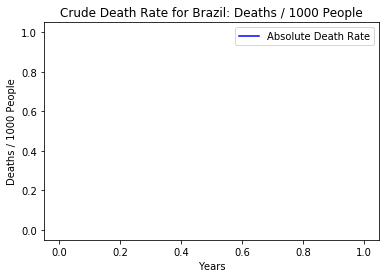

In [55]:
# CELL 31 by Mike Grad
# Plot Total Deaths for Brazil by Year

# DEBUG!! - group by year, country then sum
years = brazil_no_nans_df["Year"]

# DEBUG!! -- KeyError: 'Total Crude Death Rate'
bz_total_deaths = brazil_no_nans_df["Total Crude Death Rate"]

# Plot the world average as a line chart
brazil_no_nans_df.plot(x = "Year", y = "Total Crude Death Rate", color="blue", label="Absolute Death Rate" )

# Create a legend for our chart
plt.legend()
plt.title("Crude Death Rate for Brazil: Deaths / 1000 People")
plt.xlabel("Years")
plt.ylabel("Deaths / 1000 People")

# Show the chart
plt.show()

# CONCLUSION
# Crude death rate for Brazil has remained fairly steady at 9-11 deaths /1000 people from 2005 - 2016

In [56]:
# Troubleshooting
brazil_no_nans_df.loc[brazil_no_nans_df["name"] == "Brazil"]

,name,Year,Cause,Infant Mortality,Infant Under 1 Yr Old,Toddler Age 1 Through 4,Child Age 5 Through 19,Young Adult Age 20 Through 24,Adult Age 25 Through 34,Middle Age Adult Age 35 Through 44,Older Adult Age 45 Through 64,Elderly Age 65 Through 79,Older Elderly Age 80 and Above,Unspecified Age,Total Deaths,Total Crude Death Rate,Sex Label


In [57]:
# CELL 32 by Mike Grad
# Plot top 10 causes of all deaths for Brazil for last year of data

brazil_2016_no_nans_df = brazil_no_nans_df.loc[(brazil_no_nans_df["Year"] == 2016), :]
brazil_2016_no_nans_df.head()

# DEBUG!!  Not sorting in descending order
new_df = brazil_2016_no_nans_df.sort_values(by='Total Crude Death Rate', ascending=False)
new_df.head(10)
new_df


,name,Year,Cause,Infant Mortality,Infant Under 1 Yr Old,Toddler Age 1 Through 4,Child Age 5 Through 19,Young Adult Age 20 Through 24,Adult Age 25 Through 34,Middle Age Adult Age 35 Through 44,Older Adult Age 45 Through 64,Elderly Age 65 Through 79,Older Elderly Age 80 and Above,Unspecified Age,Total Deaths,Total Crude Death Rate,Sex Label


In [58]:
# CELL 33 by Mike Grad
# PLot top 10 leading causes of death in Brazil

# DEBUG!!
# -- only plots 3 causes
# -- all tick description all on the first
# -- list is not the top 10 due to sorting not working
x_axis = brazil_2016_top_ten_df["Cause"]
print(x_axis)
y_axis = brazil_2016_top_ten_df["Total Crude Death Rate"]
cause = brazil_2016_top_ten_df["Cause"].unique()

# tick_locations = []
# for x in x_axis:
  #  tick_locations.append(x)

plt.title("Leading Causes of Death in Brazil")
plt.xlabel("Cause of Death")
plt.ylabel("Number of Deaths per 1000 People")

#plt.xlim(-0.75, len(gyms)-.25)
#plt.ylim(0, max(members) + 5)

plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
#plt.xticks(tick_locations, cause)
plt.show()

NameError: name 'brazil_2016_top_ten_df' is not defined

In [59]:
# Troubleshooting

brazil_2016_top_ten_df["Cause"].unique

NameError: name 'brazil_2016_top_ten_df' is not defined

In [2]:
### USA Analysis
# by Anna Schaefer
# ----------------

In [60]:
#cell 100 by Anna Schaefer
all_countries_as_db=pd.read_csv("Output/no_nans_df.csv")
all_countries_as_db

,name,Year,Cause,Infant Mortality,Infant Under 1 Yr Old,Toddler Age 1 Through 4,Child Age 5 Through 19,Young Adult Age 20 Through 24,Adult Age 25 Through 34,Middle Age Adult Age 35 Through 44,Older Adult Age 45 Through 64,Elderly Age 65 Through 79,Older Elderly Age 80 and Above,Unspecified Age,Total Deaths,Total Crude Death Rate,Sex Label
0,United States of America,1999,A009,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.0,1,0.000008,Male
1,United States of America,1999,A020,0.0,0.000000,0.0,0.0,0.000008,0.000000,0.000000,0.000008,0.000008,0.000023,0.0,6,0.000045,Male
2,United States of America,1999,A020,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000007,0.000007,0.000014,0.000022,0.0,7,0.000050,Female
3,United States of America,1999,A021,0.0,0.000008,0.0,0.0,0.000008,0.000000,0.000008,0.000015,0.000045,0.000015,0.0,13,0.000098,Male
4,United States of America,1999,A021,0.0,0.000007,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000043,0.000022,0.0,10,0.000072,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172732,New Zealand,2015,Y871,0.0,0.000000,0.0,0.0,0.000000,0.000443,0.000443,0.000000,0.000443,0.000000,0.0,3,0.001329,Male
172733,New Zealand,2015,Y883,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000443,0.001329,0.000443,0.0,5,0.002215,Male
172734,New Zealand,2015,Y883,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000428,0.000855,0.001711,0.0,7,0.002993,Female
172735,New Zealand,2015,Y891,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000443,0.0,1,0.000443,Male


In [61]:
#cell 101 by Anna Schaefer
#get name, total deaths, total crude deaths, year, sex into database
new_death_data_AS_df= all_countries_as_db[["name", "Year", "Total Deaths", "Total Crude Death Rate", "Sex Label"]]
new_death_data_AS_df

,name,Year,Total Deaths,Total Crude Death Rate,Sex Label
0,United States of America,1999,1,0.000008,Male
1,United States of America,1999,6,0.000045,Male
2,United States of America,1999,7,0.000050,Female
3,United States of America,1999,13,0.000098,Male
4,United States of America,1999,10,0.000072,Female
...,...,...,...,...,...
172732,New Zealand,2015,3,0.001329,Male
172733,New Zealand,2015,5,0.002215,Male
172734,New Zealand,2015,7,0.002993,Female
172735,New Zealand,2015,1,0.000443,Male


In [62]:
#cell 102 by Anna Schaefer

us_deaths_df=new_death_data_AS_df.loc[new_death_data_AS_df["name"]== "United States of America"]
us_deaths_df

,name,Year,Total Deaths,Total Crude Death Rate,Sex Label
0,United States of America,1999,1,0.000008,Male
1,United States of America,1999,6,0.000045,Male
2,United States of America,1999,7,0.000050,Female
3,United States of America,1999,13,0.000098,Male
4,United States of America,1999,10,0.000072,Female
...,...,...,...,...,...
94376,United States of America,2007,60,0.000392,Female
94377,United States of America,2007,4,0.000027,Male
94378,United States of America,2007,14,0.000094,Male
94379,United States of America,2007,1,0.000007,Male


In [63]:
#cell 103 by Anna Schaefer
male_us_deaths_df=us_deaths_df.loc[us_deaths_df["Sex Label"]== "Male"]
male_us_deaths_df

,name,Year,Total Deaths,Total Crude Death Rate,Sex Label
0,United States of America,1999,1,0.000008,Male
1,United States of America,1999,6,0.000045,Male
3,United States of America,1999,13,0.000098,Male
5,United States of America,1999,1,0.000008,Male
6,United States of America,1999,1,0.000008,Male
...,...,...,...,...,...
94373,United States of America,2007,2,0.000013,Male
94375,United States of America,2007,49,0.000330,Male
94377,United States of America,2007,4,0.000027,Male
94378,United States of America,2007,14,0.000094,Male


In [64]:
#cell 104 by Anna Schaefer
female_us_deaths_df=us_deaths_df.loc[us_deaths_df["Sex Label"]== "Female"]
female_us_deaths_df

,name,Year,Total Deaths,Total Crude Death Rate,Sex Label
2,United States of America,1999,7,0.000050,Female
4,United States of America,1999,10,0.000072,Female
8,United States of America,1999,3,0.000022,Female
9,United States of America,1999,1,0.000007,Female
11,United States of America,1999,3,0.000022,Female
...,...,...,...,...,...
94370,United States of America,2007,14,0.000092,Female
94372,United States of America,2007,3,0.000020,Female
94374,United States of America,2007,2,0.000013,Female
94376,United States of America,2007,60,0.000392,Female


In [65]:
#cell 105 by Anna Schaefer
#create variables for dictonary 

us_year= us_deaths_df["Year"]
us_m_cdr= male_us_deaths_df["Total Crude Death Rate"]
us_f_cdr= female_us_deaths_df["Total Crude Death Rate"]

#create a dictonary to death rates by sex
us_crude_death_gender_dict = {"Year": us_year,
                           "Male Crude Death Rate": us_m_cdr,
                            "Female Crude Death Rate": us_f_cdr,
                           }
us_crude_death_gender_df = pd.DataFrame(us_crude_death_gender_dict)
us_crude_death_gender_df

,Year,Male Crude Death Rate,Female Crude Death Rate
0,1999,0.000008,NaN
1,1999,0.000045,NaN
2,1999,NaN,0.000050
3,1999,0.000098,NaN
4,1999,NaN,0.000072
...,...,...,...
94376,2007,NaN,0.000392
94377,2007,0.000027,NaN
94378,2007,0.000094,NaN
94379,2007,0.000007,NaN


In [66]:
# CELL 106 - this line added by Mike Grad
#cell 105 by Anna Schaefer
us_total_crude_deaths_df = us_crude_death_gender_df.groupby("Year").sum().reset_index()
us_total_crude_deaths_df

,Year,Male Crude Death Rate,Female Crude Death Rate
0,1999,17.639411,17.443539
1,2000,17.059726,17.099633
2,2001,16.928613,17.008854
3,2002,16.931466,16.960566
4,2003,16.806303,16.868031
5,2004,16.351034,16.308521
6,2005,16.543522,16.492741
7,2006,16.296746,16.121464
8,2007,16.204737,15.948259


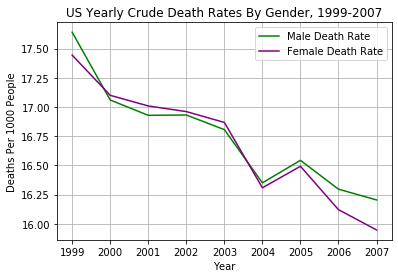

<Figure size 432x288 with 0 Axes>

In [67]:
# CELL 107 - this line added by Mike Grad
x_axis = us_total_crude_deaths_df["Year"]
y_axis_m = us_total_crude_deaths_df["Male Crude Death Rate"]
y_axis_f = us_total_crude_deaths_df["Female Crude Death Rate"]

us_male_cdr, = plt.plot(x_axis, y_axis_m, color= "green", label= "Male Death Rate")
us_female_cdr, = plt.plot(x_axis, y_axis_f, color= "purple", label= "Female Death Rate")
plt.legend(handles= [us_male_cdr, us_female_cdr], loc="best")
plt.title("US Yearly Crude Death Rates By Gender, 1999-2007")
plt.xlabel("Year")
plt.ylabel("Deaths Per 1000 People")
plt.grid()
plt.show()

#save chart
plt.savefig("Output/US Yearly Crude Death Rates By Gender, 1999-2007.png")


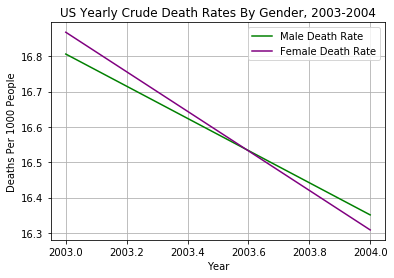

<Figure size 432x288 with 0 Axes>

In [68]:
# CELL 108 - this line added by Mike Grad
# add graph for 2003-2004
us_2003_data_df = us_total_crude_deaths_df.loc[(us_total_crude_deaths_df["Year"] == 2003) | (us_total_crude_deaths_df["Year"] == 2004) ]


x_axis = us_2003_data_df["Year"]
y_axis_m = us_2003_data_df["Male Crude Death Rate"]
y_axis_f = us_2003_data_df["Female Crude Death Rate"]

us_male_cdr, = plt.plot(x_axis, y_axis_m, color= "green", label= "Male Death Rate")
us_female_cdr, = plt.plot(x_axis, y_axis_f, color= "purple", label= "Female Death Rate")
plt.legend(handles= [us_male_cdr, us_female_cdr], loc="best")
plt.title("US Yearly Crude Death Rates By Gender, 2003-2004")
plt.xlabel("Year")
plt.ylabel("Deaths Per 1000 People")
plt.grid()
plt.show()

#save chart
plt.savefig("Output/US Yearly Crude Death Rates By Gender, 2003-2004.png")


In [69]:
# CELL 109 - this line added by Mike Grad

In [70]:
# CELL 110 - this line added by Mike Grad

In [71]:
### UK Analysis
# by Mike Grad
# ----------------

In [72]:
# CELL 200 by Mike Grad
# import dependencies - commented out as it is in the first cell

# Dependencies
# import pandas as pd
# import matplotlib.pyplot as plt
# import scipy.stats as sts
# import numpy as np

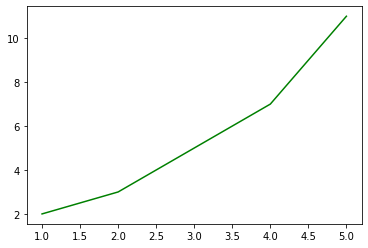

In [73]:
# CELL 201 by Mike Grad
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x,y, color="green")
plt.show()

In [74]:
# CELL 202 by Mike Grad
# Verify brazil analysis notebook is in the right directory location
#pwd

# Cell reference numbers
# usa 100-200
# uk 200-300
# nz 300-400
# can 400 - 500
# bz 500 - 600

In [75]:
# CELL 203 by Mike Grad
# Read brazil cleaned data

# Assign file pathsOutput/age_adj_bz_df.csv"
file_one = "Output/age_adj_bz_df.csv"
file_two = "Output/no_nans_df.csv"

# open cleaned brazil data
age_adj_uk_df = pd.read_csv(file_one, encoding="utf-8")
cdr_5_countries_df = pd.read_csv(file_two, encoding="utf-8")

age_adj_uk_df.head()

,Country,Year,Cause,Sex,Total Deaths,Under 1 Yr Old,Age 1 Through 4,Age 5 Through 19,Age 20 Through 24,Age 25 Through 34,Age 35 Through 44,Age 45 Through 64,Age 65 Through 79,Age 80 and Above,Unspecified Age,Pop1,name
0,2070,1996,A000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazil
1,2070,1996,A001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazil
2,2070,1996,A001,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazil
3,2070,1996,A009,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazil
4,2070,1996,A009,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazil


In [76]:
# CELL 204 by Mike Grad
# Aggregate age adjusted death rate by year to get total deaths v year

# DEBUG!!  TypeError: object of type 'method' has no len()
# create list of years
year_list = age_adj_uk_df["Year"].unique
#print(len(year_list))

# create list of total age adjusted deaths grouped by year
year_total_df = age_adj_uk_df[["Year", "Total Deaths"]]
year_total_df

# group by years
year_total_df.groupby("Year").sum()
# sum Total Deaths

# Redo Index

# CONCLUSION:  Cannot use age_adj since sum of deaths = 0 for all years for all 5 countries

,Total Deaths
Year,
1996,0.0
1997,0.0
1998,0.0
1999,0.0
2000,0.0
2001,0.0
2002,0.0
2003,0.0
2004,0.0


In [77]:
# CELL 205 by Mike Grad
# Extract UK from cdr_5_countries_df


cdr_uk_df = cdr_5_countries_df.loc[cdr_5_countries_df["name"] == "United Kingdom", :]
len(cdr_uk_df)
# United States of America has 64772 rows by Anna Schaefer
# Canada has 0 rows
# United Kingdom has 77277 rows by Mike Grad
# New Zealand has 30688 rows by Nicole Langford
# Brazil has 0 rows
cdr_uk_df.head()

,name,Year,Cause,Infant Mortality,Infant Under 1 Yr Old,Toddler Age 1 Through 4,Child Age 5 Through 19,Young Adult Age 20 Through 24,Adult Age 25 Through 34,Middle Age Adult Age 35 Through 44,Older Adult Age 45 Through 64,Elderly Age 65 Through 79,Older Elderly Age 80 and Above,Unspecified Age,Total Deaths,Total Crude Death Rate,Sex Label
44214,United Kingdom,2001,A020,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000035,0.000069,0.000035,0.0,4,0.000139,Male
44215,United Kingdom,2001,A020,0.0,0.0,0.000000,0.0,0.0,0.000033,0.0,0.000000,0.000198,0.000132,0.0,11,0.000364,Female
44216,United Kingdom,2001,A021,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000035,0.000069,0.000035,0.0,4,0.000139,Male
44217,United Kingdom,2001,A021,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000033,0.000000,0.000066,0.0,3,0.000099,Female
44218,United Kingdom,2001,A022,0.0,0.0,0.000035,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1,0.000035,Male


In [78]:
# CELL 206 by Mike Grad

# create list of total age adjusted deaths grouped by year
year_total_uk_df = cdr_uk_df[["Year", "Total Crude Death Rate"]]
year_total_uk_df

# group by years
#year_total_uk_df.groupby("Year").sum()
# sum Total Deaths

# Reset Index
#year_total_uk_df = year_total_uk_df.reset_index()
year_total_uk_df

,Year,Total Crude Death Rate
44214,2001,0.000139
44215,2001,0.000364
44216,2001,0.000139
44217,2001,0.000099
44218,2001,0.000035
...,...,...
152002,2016,0.000154
152003,2016,0.000090
152004,2016,0.000030
152005,2016,0.000340


No handles with labels found to put in legend.


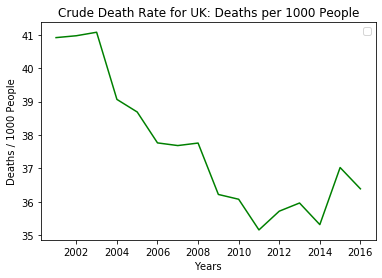

In [79]:
# CELL 207 by Mike Grad
# plot time series of death rates for uk

# Plot Total Deaths for Brazil by Year

# Plot the crude death rate for uk as a line chart
#year_total_uk_df.plot(x = "Year", y = "Total Crude Death Rate", color="blue", label="Death Rate per 1000 People" )

#x = list(year_total_uk_df.groupby("Year").sum())
#y = list(year_total_uk_df["Total Crude Death Rate"])

#plt.plot(x,y, color="green")

#plt.show()
x
len(x)

x
x = year_total_uk_df.groupby("Year").sum().reset_index()["Year"]
y = year_total_uk_df.groupby("Year").sum().reset_index()["Total Crude Death Rate"]
plt.plot(x,y, color="green")

plt.legend()
plt.title("Crude Death Rate for UK: Deaths per 1000 People")
plt.xlabel("Years")
plt.ylabel("Deaths / 1000 People")

# Save chart
plt.savefig("Output/UK Crude Death Rates.png")

# Show the chart
plt.show()

In [80]:
# 209 Create a data series for male vs. female crude death rates
cdr_uk_df.head()

# create df with just male and just female data
uk_male_deaths_df = cdr_uk_df.loc[cdr_uk_df["Sex Label"]== "Male"]
uk_female_deaths_df = cdr_uk_df.loc[cdr_uk_df["Sex Label"]== "Female"]
uk_female_deaths_df

,name,Year,Cause,Infant Mortality,Infant Under 1 Yr Old,Toddler Age 1 Through 4,Child Age 5 Through 19,Young Adult Age 20 Through 24,Adult Age 25 Through 34,Middle Age Adult Age 35 Through 44,Older Adult Age 45 Through 64,Elderly Age 65 Through 79,Older Elderly Age 80 and Above,Unspecified Age,Total Deaths,Total Crude Death Rate,Sex Label
44215,United Kingdom,2001,A020,0.0,0.0,0.0,0.00000,0.0,0.000033,0.0,0.000000,0.000198,0.000132,0.0,11,0.000364,Female
44217,United Kingdom,2001,A021,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000033,0.000000,0.000066,0.0,3,0.000099,Female
44221,United Kingdom,2001,A044,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000033,0.0,1,0.000033,Female
44224,United Kingdom,2001,A047,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000397,0.003307,0.012599,0.0,493,0.016302,Female
44225,United Kingdom,2001,A048,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000033,0.000165,0.0,6,0.000198,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151998,United Kingdom,2016,Y86,0.0,0.0,0.0,0.00003,0.0,0.000000,0.0,0.000120,0.000331,0.000661,0.0,38,0.001142,Female
152000,United Kingdom,2016,Y870,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000030,0.000000,0.000000,0.0,1,0.000030,Female
152003,United Kingdom,2016,Y872,0.0,0.0,0.0,0.00000,0.0,0.000030,0.0,0.000060,0.000000,0.000000,0.0,3,0.000090,Female
152004,United Kingdom,2016,Y881,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000030,0.0,1,0.000030,Female


In [81]:
# CELL 210 by Mike Grad
# create df with just year, male crude death rate and female crude death rate
uk_gender_year = cdr_uk_df["Year"]
uk_male_cdr = uk_male_deaths_df["Total Crude Death Rate"]
uk_female_cdr = uk_female_deaths_df["Total Crude Death Rate"]

uk_crude_death_gender_dict = {"Year": uk_gender_year,
                            "male crude death rate": uk_male_cdr,
                            "female crude death rate": uk_female_cdr
                           }
uk_crude_death_gender_df = pd.DataFrame(uk_crude_death_gender_dict)
uk_crude_death_gender_df

,Year,male crude death rate,female crude death rate
44214,2001,0.000139,NaN
44215,2001,NaN,0.000364
44216,2001,0.000139,NaN
44217,2001,NaN,0.000099
44218,2001,0.000035,NaN
...,...,...,...
152002,2016,0.000154,NaN
152003,2016,NaN,0.000090
152004,2016,NaN,0.000030
152005,2016,0.000340,NaN


In [82]:
# CELL 211 by Mike Grad
# Group by year and sum crude death rates for male and female columns
uk_total_crude_deaths_df = uk_crude_death_gender_df.groupby("Year").sum().reset_index()
uk_total_crude_deaths_df

,Year,male crude death rate,female crude death rate
0,2001,19.989099,20.928636
1,2002,19.961142,21.012728
2,2003,19.869266,21.209523
3,2004,19.053103,20.012705
4,2005,18.805211,19.882993
5,2006,18.468465,19.293647
6,2007,18.377391,19.304846
7,2008,18.357063,19.400214
8,2009,17.831297,18.385225
9,2010,17.683827,18.389174


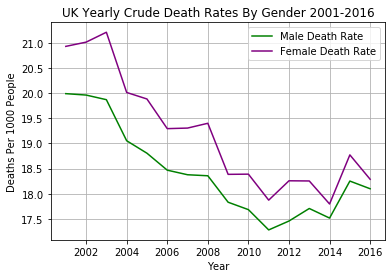

In [83]:
# CELL 212 by Mike Grad
# Plot male and female crude death rates
x_axis = uk_total_crude_deaths_df["Year"]
y_axis_male = uk_total_crude_deaths_df["male crude death rate"]
y_axis_female = uk_total_crude_deaths_df["female crude death rate"]

uk_male_cdr, = plt.plot(x_axis, y_axis_male, color= "green", label= "Male Death Rate")
uk_female_cdr, = plt.plot(x_axis, y_axis_female, color= "purple", label= "Female Death Rate")
plt.legend(handles= [uk_male_cdr, uk_female_cdr], loc="best")
plt.title("UK Yearly Crude Death Rates By Gender 2001-2016")
plt.xlabel("Year")
plt.ylabel("Deaths Per 1000 People")
plt.grid()

# Save chart
plt.savefig("Output/UK Male & Female Crude Death Rates.png")
plt.show()

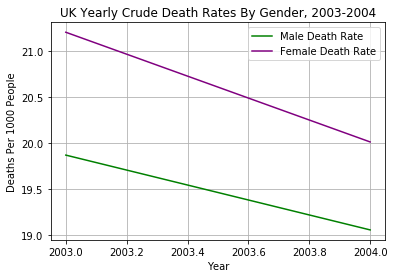

In [84]:
# CELL 213 by Mike Grad
# zoom in on 2003 - 2004 data only

uk_2003_data_df = uk_total_crude_deaths_df.loc[(uk_total_crude_deaths_df["Year"] == 2003) | (uk_total_crude_deaths_df["Year"] == 2004) ]


x_axis = uk_2003_data_df["Year"]
y_axis_m = uk_2003_data_df["male crude death rate"]
y_axis_f = uk_2003_data_df["female crude death rate"]

# DEBUG!!
uk_male_cdr, = plt.plot(x_axis, y_axis_m, color= "green", label= "Male Death Rate")
uk_female_cdr, = plt.plot(x_axis, y_axis_f, color= "purple", label= "Female Death Rate")
plt.legend(handles= [uk_male_cdr, uk_female_cdr], loc="best")
plt.title("UK Yearly Crude Death Rates By Gender, 2003-2004")
plt.xlabel("Year")
plt.ylabel("Deaths Per 1000 People")
plt.grid()

# Save chart
plt.savefig("Output/2003-2004 UK Male & Female Crude Death Rates.png")
plt.show()

In [85]:
# CELL 214 by Mike Grad
# create df with just year, male crude death rate and female crude death rate for INFANTS

# FIXED
uk_gender_year = cdr_uk_df["Year"]
uk_male_infant_cdr = uk_male_deaths_df["Infant Under 1 Yr Old"]
uk_female_infant_cdr = uk_female_deaths_df["Infant Under 1 Yr Old"]

uk_infant_crude_death_gender_dict = {"Year": uk_gender_year,
                            "male infant crude death rate": uk_male_infant_cdr,
                            "female infant crude death rate": uk_female_infant_cdr
                           }
uk_infant_crude_death_gender_df = pd.DataFrame(uk_infant_crude_death_gender_dict)
uk_infant_crude_death_gender_df.head()

,Year,male infant crude death rate,female infant crude death rate
44214,2001,0.0,NaN
44215,2001,NaN,0.0
44216,2001,0.0,NaN
44217,2001,NaN,0.0
44218,2001,0.0,NaN


In [86]:
# CELL 215 by Mike Grad
# Group by year and sum infant crude death rates for male and female columns
uk_total_infant_crude_deaths_df = uk_infant_crude_death_gender_df.groupby("Year").sum().reset_index()
uk_total_infant_crude_deaths_df

,Year,male infant crude death rate,female infant crude death rate
0,2001,0.142453,0.108395
1,2002,0.141553,0.098027
2,2003,0.140645,0.107657
3,2004,0.138876,0.106386
4,2005,0.143540,0.101167
5,2006,0.139961,0.107402
6,2007,0.141262,0.104768
7,2008,0.140823,0.103868
8,2009,0.136103,0.102489
9,2010,0.124987,0.100510


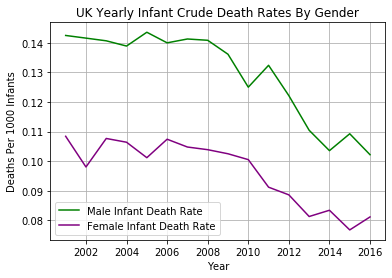

In [87]:
# CELL 216 by Mike Grad
# Plot male and female infant crude death rates
x_axis = uk_total_infant_crude_deaths_df["Year"]
y_axis_infant_male = uk_total_infant_crude_deaths_df["male infant crude death rate"]
y_axis_infant_female = uk_total_infant_crude_deaths_df["female infant crude death rate"]

uk_infant_male_cdr, = plt.plot(x_axis, y_axis_infant_male, color= "green", label= "Male Infant Death Rate")
uk_infant_female_cdr, = plt.plot(x_axis, y_axis_infant_female, color= "purple", label= "Female Infant Death Rate")
plt.legend(handles= [uk_infant_male_cdr, uk_infant_female_cdr], loc="best")
plt.title("UK Yearly Infant Crude Death Rates By Gender")
plt.xlabel("Year")
plt.ylabel("Deaths Per 1000 Infants")
plt.grid()

# Save chart
plt.savefig("Output/UK Male & Female Infant Crude Death Rates.png")
plt.show()

In [88]:
# CELL 217 by Mike Grad
# create df with just year, male crude death rate and female crude death rate for Age 25 Through 34

# FIXED
uk_gender_year = cdr_uk_df["Year"]
uk_male_adult_cdr = uk_male_deaths_df["Adult Age 25 Through 34"]
uk_female_adult_cdr = uk_female_deaths_df["Adult Age 25 Through 34"]

uk_adult_crude_death_gender_dict = {"Year": uk_gender_year,
                            "male adults crude death rate": uk_male_adult_cdr,
                            "female adults crude death rate": uk_female_adult_cdr
                           }
uk_adult_crude_death_gender_df = pd.DataFrame(uk_adult_crude_death_gender_dict)
uk_adult_crude_death_gender_df.head()

,Year,male adults crude death rate,female adults crude death rate
44214,2001,0.0,NaN
44215,2001,NaN,0.000033
44216,2001,0.0,NaN
44217,2001,NaN,0.000000
44218,2001,0.0,NaN


In [89]:
# CELL 218 by Mike Grad
# Group by year and sum adult (age 25-34) crude death rates for male and female columns
uk_total_adult_crude_deaths_df = uk_adult_crude_death_gender_df.groupby("Year").sum().reset_index()
uk_total_adult_crude_deaths_df

,Year,male adults crude death rate,female adults crude death rate
0,2001,0.309550,0.125326
1,2002,0.300024,0.121084
2,2003,0.277648,0.122764
3,2004,0.261699,0.115481
4,2005,0.248161,0.109559
5,2006,0.250017,0.103841
6,2007,0.248094,0.101419
7,2008,0.246623,0.106750
8,2009,0.233555,0.103508
9,2010,0.218254,0.100447


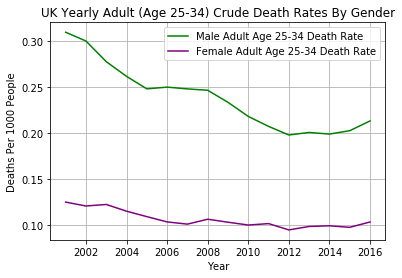

In [90]:
# CELL 219 by Mike Grad
# Plot male and female adults (age 25-34) crude death rates
x_axis = uk_total_adult_crude_deaths_df["Year"]
y_axis_adult_male = uk_total_adult_crude_deaths_df["male adults crude death rate"]
y_axis_adult_female = uk_total_adult_crude_deaths_df["female adults crude death rate"]

uk_adult_male_cdr, = plt.plot(x_axis, y_axis_adult_male, color= "green", label= "Male Adult Age 25-34 Death Rate")
uk_adult_female_cdr, = plt.plot(x_axis, y_axis_adult_female, color= "purple", label= "Female Adult Age 25-34 Death Rate")
plt.legend(handles= [uk_adult_male_cdr, uk_adult_female_cdr], loc="best")
plt.title("UK Yearly Adult (Age 25-34) Crude Death Rates By Gender")
plt.xlabel("Year")
plt.ylabel("Deaths Per 1000 People")
plt.grid()

# Save chart
plt.savefig("Output/UK Male & Female Adult (Age 25-34) Crude Death Rates.png")
plt.show()

In [91]:
# CELL 220 by Mike Grad
# create df with just year, male crude death rate and female crude death rate for ELDERLY Age 80 and Above

# FIXED
uk_gender_year = cdr_uk_df["Year"]
uk_male_elderly_cdr = uk_male_deaths_df["Older Elderly Age 80 and Above"]
uk_female_elderly_cdr = uk_female_deaths_df["Older Elderly Age 80 and Above"]

uk_elderly_crude_death_gender_dict = {"Year": uk_gender_year,
                            "male elderly crude death rate": uk_male_elderly_cdr,
                            "female elderly crude death rate": uk_female_elderly_cdr
                           }
uk_elderly_crude_death_gender_df = pd.DataFrame(uk_elderly_crude_death_gender_dict)
uk_elderly_crude_death_gender_df.head()

,Year,male elderly crude death rate,female elderly crude death rate
44214,2001,0.000035,NaN
44215,2001,NaN,0.000132
44216,2001,0.000035,NaN
44217,2001,NaN,0.000066
44218,2001,0.000000,NaN


In [92]:
# CELL 221 by Mike Grad
# Group by year and sum ELDERLY (age 80 and above) crude death rates for male and female columns
uk_total_elderly_crude_deaths_df = uk_elderly_crude_death_gender_df.groupby("Year").sum().reset_index()
uk_total_elderly_crude_deaths_df

,Year,male elderly crude death rate,female elderly crude death rate
0,2001,7.330334,12.133694
1,2002,7.534083,12.402532
2,2003,7.734712,12.695762
3,2004,7.461039,11.950583
4,2005,7.537910,11.996742
5,2006,7.509876,11.650262
6,2007,7.627664,11.808399
7,2008,7.746389,11.959662
8,2009,7.614668,11.289344
9,2010,7.656693,11.398377


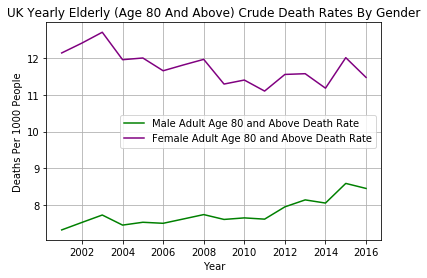

In [93]:
# CELL 222 by Mike Grad
# Plot male and female ELDERLY (age 80 and above) crude death rates
x_axis = uk_total_elderly_crude_deaths_df["Year"]
y_axis_elderly_male = uk_total_elderly_crude_deaths_df["male elderly crude death rate"]
y_axis_elderly_female = uk_total_elderly_crude_deaths_df["female elderly crude death rate"]

uk_elderly_male_cdr, = plt.plot(x_axis, y_axis_elderly_male, color= "green", label= "Male Adult Age 80 and Above Death Rate")
uk_elderly_female_cdr, = plt.plot(x_axis, y_axis_elderly_female, color= "purple", label= "Female Adult Age 80 and Above Death Rate")

# DEBUG:  NameError: name 'uk_adult_elderly_cdr' is not defined
plt.legend(handles= [uk_elderly_male_cdr, uk_elderly_female_cdr], loc="best")
plt.title("UK Yearly Elderly (Age 80 And Above) Crude Death Rates By Gender")
plt.xlabel("Year")
plt.ylabel("Deaths Per 1000 People")
plt.grid()

# Save chart
plt.savefig("Output/UK Male & Female Elderly (Age 80 And Above) Crude Death Rates.png")
plt.show()

In [94]:
### New Zealand Analysis
# by Nicole Langford
# ----------------

In [95]:
#Cell 300 by Nicole Langford

#read the csvs that need to be analyzed
all_countries_nl_db = pd.read_csv("Output/no_nans_df.csv")
all_countries_nl_db

,name,Year,Cause,Infant Mortality,Infant Under 1 Yr Old,Toddler Age 1 Through 4,Child Age 5 Through 19,Young Adult Age 20 Through 24,Adult Age 25 Through 34,Middle Age Adult Age 35 Through 44,Older Adult Age 45 Through 64,Elderly Age 65 Through 79,Older Elderly Age 80 and Above,Unspecified Age,Total Deaths,Total Crude Death Rate,Sex Label
0,United States of America,1999,A009,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.0,1,0.000008,Male
1,United States of America,1999,A020,0.0,0.000000,0.0,0.0,0.000008,0.000000,0.000000,0.000008,0.000008,0.000023,0.0,6,0.000045,Male
2,United States of America,1999,A020,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000007,0.000007,0.000014,0.000022,0.0,7,0.000050,Female
3,United States of America,1999,A021,0.0,0.000008,0.0,0.0,0.000008,0.000000,0.000008,0.000015,0.000045,0.000015,0.0,13,0.000098,Male
4,United States of America,1999,A021,0.0,0.000007,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000043,0.000022,0.0,10,0.000072,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172732,New Zealand,2015,Y871,0.0,0.000000,0.0,0.0,0.000000,0.000443,0.000443,0.000000,0.000443,0.000000,0.0,3,0.001329,Male
172733,New Zealand,2015,Y883,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000443,0.001329,0.000443,0.0,5,0.002215,Male
172734,New Zealand,2015,Y883,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000428,0.000855,0.001711,0.0,7,0.002993,Female
172735,New Zealand,2015,Y891,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000443,0.0,1,0.000443,Male


In [96]:
#cell 301 by Nicole Langford
#get name, total deaths, total crude deaths, year, sex into a database

new_death_data_df = all_countries_nl_db[["name", "Year", "Total Deaths", "Total Crude Death Rate", "Sex Label"]]
new_death_data_df

,name,Year,Total Deaths,Total Crude Death Rate,Sex Label
0,United States of America,1999,1,0.000008,Male
1,United States of America,1999,6,0.000045,Male
2,United States of America,1999,7,0.000050,Female
3,United States of America,1999,13,0.000098,Male
4,United States of America,1999,10,0.000072,Female
...,...,...,...,...,...
172732,New Zealand,2015,3,0.001329,Male
172733,New Zealand,2015,5,0.002215,Male
172734,New Zealand,2015,7,0.002993,Female
172735,New Zealand,2015,1,0.000443,Male


In [97]:
#cell 302 by Nicole Langford

nz_deaths_df = new_death_data_df.loc[new_death_data_df["name"]== "New Zealand"]
nz_deaths_df

,name,Year,Total Deaths,Total Crude Death Rate,Sex Label
63865,New Zealand,2000,2,0.001018,Female
63866,New Zealand,2000,1,0.000528,Male
63867,New Zealand,2000,3,0.001585,Male
63868,New Zealand,2000,4,0.002037,Female
63869,New Zealand,2000,1,0.000509,Female
...,...,...,...,...,...
172732,New Zealand,2015,3,0.001329,Male
172733,New Zealand,2015,5,0.002215,Male
172734,New Zealand,2015,7,0.002993,Female
172735,New Zealand,2015,1,0.000443,Male


In [98]:
#cell 303 by Nicole Langford
male_nz_deaths_df = nz_deaths_df.loc[nz_deaths_df["Sex Label"]== "Male"]
male_nz_deaths_df

,name,Year,Total Deaths,Total Crude Death Rate,Sex Label
63866,New Zealand,2000,1,0.000528,Male
63867,New Zealand,2000,3,0.001585,Male
63870,New Zealand,2000,3,0.001585,Male
63872,New Zealand,2000,3,0.001585,Male
63874,New Zealand,2000,1,0.000528,Male
...,...,...,...,...,...
172730,New Zealand,2015,21,0.009302,Male
172732,New Zealand,2015,3,0.001329,Male
172733,New Zealand,2015,5,0.002215,Male
172735,New Zealand,2015,1,0.000443,Male


In [99]:
#cell 304 by Nicole Langford
female_nz_deaths_df = nz_deaths_df.loc[nz_deaths_df["Sex Label"]== "Female"]
female_nz_deaths_df

,name,Year,Total Deaths,Total Crude Death Rate,Sex Label
63865,New Zealand,2000,2,0.001018,Female
63868,New Zealand,2000,4,0.002037,Female
63869,New Zealand,2000,1,0.000509,Female
63871,New Zealand,2000,1,0.000509,Female
63873,New Zealand,2000,2,0.001018,Female
...,...,...,...,...,...
172725,New Zealand,2015,1,0.000428,Female
172727,New Zealand,2015,1,0.000428,Female
172729,New Zealand,2015,5,0.002138,Female
172731,New Zealand,2015,10,0.004276,Female


In [100]:
#cell 305 by Nicole Langford
#creating new dataframe by gender
#create new variables for year and CDRs

NZ_Year = nz_deaths_df["Year"]
NZ_M_CDR = male_nz_deaths_df["Total Crude Death Rate"]
NZ_F_CDR = female_nz_deaths_df["Total Crude Death Rate"]


nz_crude_death_gender_dict = {"Year": NZ_Year,
                            "male crude death rate": NZ_M_CDR,
                            "female crude death rate": NZ_F_CDR
                           }
nz_crude_death_gender_df = pd.DataFrame(nz_crude_death_gender_dict)
nz_crude_death_gender_df

,Year,male crude death rate,female crude death rate
63865,2000,NaN,0.001018
63866,2000,0.000528,NaN
63867,2000,0.001585,NaN
63868,2000,NaN,0.002037
63869,2000,NaN,0.000509
...,...,...,...
172732,2015,0.001329,NaN
172733,2015,0.002215,NaN
172734,2015,NaN,0.002993
172735,2015,0.000443,NaN


In [101]:
#cell 306 by Nicole Langford
nz_total_crude_deaths_df = nz_crude_death_gender_df.groupby("Year").sum().reset_index()
nz_total_crude_deaths_df

,Year,male crude death rate,female crude death rate
0,2000,14.592610,13.140879
1,2001,14.883477,14.125977
2,2002,14.680939,14.128678
3,2003,14.271872,13.737086
4,2004,14.178754,13.861814
5,2005,13.325499,12.942967
6,2006,13.683542,13.458478
7,2007,13.844631,13.225806
8,2008,13.949664,13.526850
9,2009,13.805840,13.273286


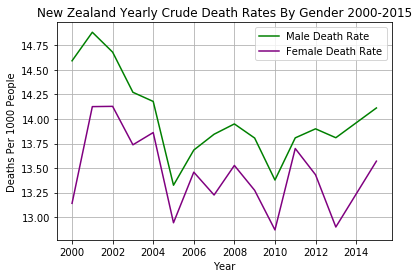

In [102]:
#cell 307 by Nicole Langford
x_axis = nz_total_crude_deaths_df["Year"]
y_axis_m = nz_total_crude_deaths_df["male crude death rate"]
y_axis_f = nz_total_crude_deaths_df["female crude death rate"]

nz_male_cdr, = plt.plot(x_axis, y_axis_m, color= "green", label= "Male Death Rate")
nz_female_cdr, = plt.plot(x_axis, y_axis_f, color= "purple", label= "Female Death Rate")
plt.legend(handles= [nz_male_cdr, nz_female_cdr], loc="best")
plt.title("New Zealand Yearly Crude Death Rates By Gender 2000-2015")
plt.xlabel("Year")
plt.ylabel("Deaths Per 1000 People")
plt.grid()
plt.show()

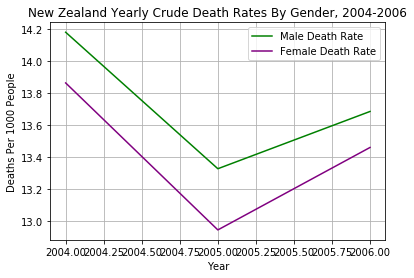

In [103]:
#cell 308 by Nicole Langford
#create graph to drill down on years 2004-2006
nz_2004_data_df = nz_total_crude_deaths_df.loc[(nz_total_crude_deaths_df["Year"] == 2004) | (nz_total_crude_deaths_df["Year"] == 2006) | (nz_total_crude_deaths_df["Year"] == 2005)]


x_axis = nz_2004_data_df["Year"]
y_axis_m = nz_2004_data_df["male crude death rate"]
y_axis_f = nz_2004_data_df["female crude death rate"]

nz_male_cdr, = plt.plot(x_axis, y_axis_m, color= "green", label= "Male Death Rate")
nz_female_cdr, = plt.plot(x_axis, y_axis_f, color= "purple", label= "Female Death Rate")
plt.legend(handles= [nz_male_cdr, nz_female_cdr], loc="best")
plt.title("New Zealand Yearly Crude Death Rates By Gender, 2004-2006")
plt.xlabel("Year")
plt.ylabel("Deaths Per 1000 People")
plt.grid()
plt.show()